In [18]:
# -*- coding: utf-8 -*-

#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Importing the dataset
with open('brainbodyweight.txt','r') as fptr:
    
    line = fptr.readline()
    l1 = []
    noOfColumns = 0
    noOfRows = 0
    
    while line:    
        if line[0] == '#':
            line = fptr.readline()
            continue
            
        if line[0] != '#' and (noOfColumns==0 or noOfRows==0):
            datalist = line[:-1].split(' ')

            if datalist[1] == 'columns':
                noOfColumns = int(datalist[0])
                col = 0
            
            elif datalist[1] == 'rows':
                noOfRows = int(datalist[0])
                row = 0

        elif line[0] != '#' and noOfColumns>0 and noOfRows>0:
            datalist = line[:-1].strip().split()

            if col<noOfColumns:
                l1.append(' '.join(datalist))
                col += 1

            elif row<noOfRows:
                l1 += datalist
                row += 1       

        line = fptr.readline()

dataset = np.array([l1]).reshape((noOfRows+1,noOfColumns))
X = dataset[1:,1].astype('float64')
y = dataset[1:,2].astype('float64')


In [20]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)


In [21]:
# Feature Scaling
from  sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train.reshape(-1,1))
X_test_scaled = sc_X.transform(X_test.reshape(-1,1))

sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1,1))


In [22]:
# fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# predicting the test set results 
y_pred = linearRegressor.predict(X_test_scaled)

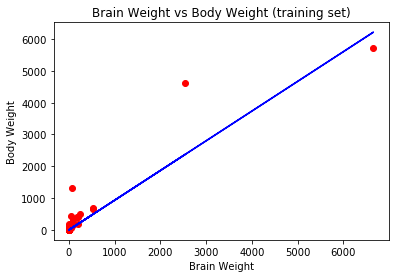

In [24]:
# Visualising the training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, linearRegressor.predict(X_train.reshape(-1,1)), color='blue')
plt.title('Brain Weight vs Body Weight (training set)')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

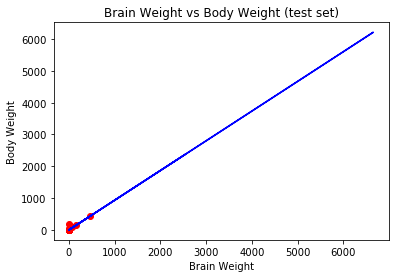

In [25]:
# Visualising the test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, linearRegressor.predict(X_train.reshape(-1,1)), color='blue')
plt.title('Brain Weight vs Body Weight (test set)')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()